In [1]:
from sshtunnel import SSHTunnelForwarder
import matplotlib.pyplot as plt
import psycopg2
import contextily as ctx
import geopandas as gpd 
import pandas as pd
import sqlalchemy
import requests
import json

In [6]:
SSH_HOST = "ec2-157-175-27-29.me-south-1.compute.amazonaws.com"
SSH_USER = "bahawsuser"
SSH_PRIVATE_KEY = "G:\\bahawsuser\\bahawsuser.pem"

REMOTE_DB_HOST = "172.31.2.6"  # Internal DB host from your SSH command
REMOTE_DB_PORT = 5432
LOCAL_PORT = 63333  # Same as the one you used in Bash

DB_USER = "postgres"
DB_PASSWORD = "postgres"
DB_NAME = "postgres"

# Start SSH Tunnel
with SSHTunnelForwarder(
    (SSH_HOST, 22),
    ssh_username=SSH_USER,
    ssh_pkey=SSH_PRIVATE_KEY,  # Private key authentication
    remote_bind_address=(REMOTE_DB_HOST, REMOTE_DB_PORT),
    local_bind_address=('localhost', 63333)  # Forwarded local port
) as tunnel:
    print("SSH Tunnel established")

    # Connect to PostgreSQL through the tunnel
    conn = psycopg2.connect(
        host='localhost',
        port=LOCAL_PORT,
        user=DB_USER,
        password=DB_PASSWORD,
        database=DB_NAME
    )

    cursor = conn.cursor()
    cursor.execute("SELECT version();")
    print("Connected to:", cursor.fetchone())

SSH Tunnel established
Connected to: ('PostgreSQL 14.15 (Ubuntu 14.15-0ubuntu0.22.04.1) on x86_64-pc-linux-gnu, compiled by gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0, 64-bit',)


In [2]:
url ="https://services5.arcgis.com/suYQEXciiSqMkuPN/arcgis/rest/services/XPrize_Target_Areas_Day_2/FeatureServer/0/query?where=1%3D1&outFields=*&f=geojson&token=AAPTxy8BH1VEsoebNVZXo8HurHjWuisUOoFqxo0tT38w4NHoIaHWNdbBhJwoG7snyphupYaWUPxEEHPLp49n1KALRr4JLaEBWsJoA6PVZrkRYbYdxCTMwfyfFR_BzmGSEfHDSjEeZRoWmaYGAkeV4f1-iaaqYebDw2Y44gl_BPvtqHb6XP0JjRglFLOBODVB6ThKZ38CyzlxBccHQWWbLTXeruVGRuPTT_a6jLAD6gGrrMEMpta0oV1Zn4djGSm-2aSVAT1_Tx1JQzY7"


In [4]:
response = requests.get(url)

In [5]:
cont=response.content

In [ ]:
geojson_dict = json.loads(cont)
geojson_dict

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 67,
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-121.976497343497, 51.9276493096847],
      [-121.976498622178, 51.9276342640906],
      [-121.97650244421, 51.9276193833341],
      [-121.976508767718, 51.9276048304524],
      [-121.976517523421, 51.92759076489],
      [-121.97652861539, 51.927577340753],
      [-121.976541922098, 51.9275647051194],
      [-121.976557297754, 51.9275529964287],
      [-121.976574573901, 51.9275423429645],
      [-121.976593561255, 51.9275328614493],
      [-121.976614051789, 51.9275246557652],
      [-121.976635821003, 51.9275178158161],
      [-121.976658630389, 51.9275124165427],
      [-121.976682230044, 51.9275085171009],
      [-121.976706361403, 51.9275061602144],
      [-121.97673076008, 51.9275053717058],
      [-121.976755158757, 51.9275061602144],
      [-121.976779290116, 51.9275085171009],
      [-121.976802889771, 51.9275124165427],
      [-121.976825699157

In [7]:
df= gpd.GeoDataFrame.from_features(geojson_dict,crs=4326)

In [8]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   geometry            15 non-null     geometry
 1   OBJECTID            15 non-null     int64   
 2   TargetNumber        15 non-null     int64   
 3   NotificationNumber  15 non-null     int64   
 4   StartTime           15 non-null     int64   
 5   EndTime             15 non-null     int64   
dtypes: geometry(1), int64(5)
memory usage: 852.0 bytes


In [9]:
print(df.crs)

EPSG:4326


In [10]:
df["StartTime"] = pd.to_datetime(df["StartTime"], unit="ms")
df["EndTime"] = pd.to_datetime(df["EndTime"], unit="ms")

In [11]:
df

,geometry,OBJECTID,TargetNumber,NotificationNumber,StartTime,EndTime
0,"POLYGON ((-121.9765 51.92765, -121.9765 51.927...",67,21,5,2024-03-20 00:25:00,2024-03-20 00:35:00
1,"POLYGON ((-121.97122 51.9268, -121.97143 51.92...",68,21,4,2024-03-19 16:45:00,2024-03-20 05:41:00
2,"POLYGON ((-121.98532 51.93114, -121.95855 51.9...",69,21,3,2024-02-29 14:53:00,2024-03-30 19:50:00
3,"POLYGON ((-121.96456 52.02795, -121.95436 51.9...",70,21,2,2024-02-24 01:33:00,2024-04-03 20:07:00
4,"POLYGON ((-122.44124 52.22257, -121.53748 52.2...",71,21,1,2024-02-19 00:20:00,2024-04-10 00:17:00
5,"POLYGON ((148.2973 -36.06068, 148.2973 -36.060...",72,23,5,2024-12-27 01:28:00,2024-12-27 01:35:00
6,"POLYGON ((148.29774 -36.0617, 148.2971 -36.061...",73,23,4,2024-12-26 20:11:00,2024-12-27 07:01:00
7,"POLYGON ((148.29299 -36.05836, 148.336 -36.058...",74,23,3,2024-12-14 15:15:00,2024-12-30 17:58:00
8,"POLYGON ((148.22565 -36.04844, 148.29458 -36.0...",75,23,2,2024-11-03 04:41:00,2024-12-31 06:00:00
9,"POLYGON ((148.90806 -37.04437, 148.05248 -36.2...",76,23,1,2024-09-04 16:48:00,2024-12-31 07:00:00


ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

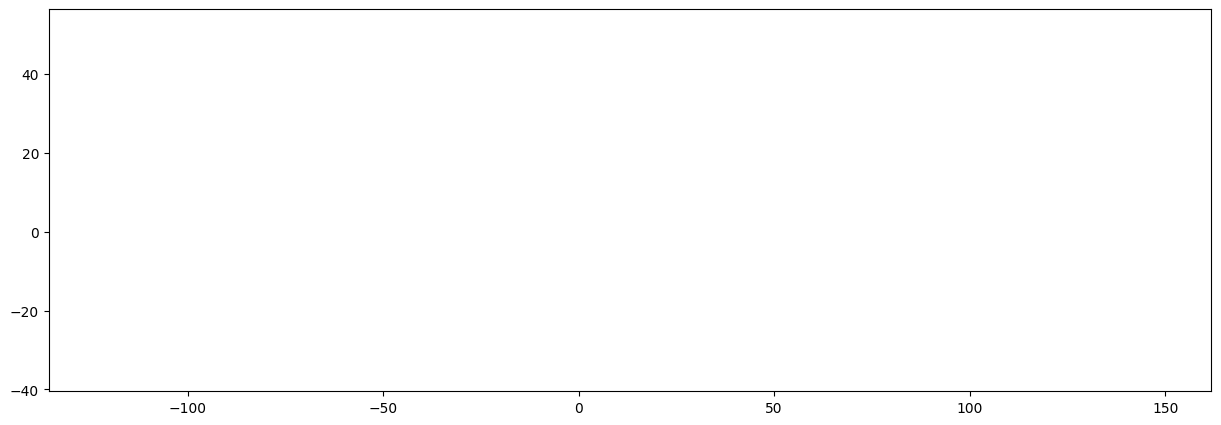

In [12]:
for each in df["NotificationNumber"].unique():
    fig, ax = plt.subplots(figsize=(15, 8))
    subset= df[df["NotificationNumber"] == each]
    subset.plot(ax=ax)
    ctx.add_basemap(ax, crs=df.crs.to_string(),source=ctx.providers.CartoDB.Voyager)
    ax.set_title(f"Notification Number: {each}")
    ax.axis("off")
    plt.show()

In [ ]:
for each in df["NotificationNumber"].unique():
    subset= df[df["NotificationNumber"] == each]
    print(f"-----Notfication Number {each}----")
    date_ranges = list(zip(subset["StartTime"], subset["EndTime"]))
    query = """
    SELECT * FROM c18.firms_data_v2 WHERE
    """
    date_conditions = [f"(acq_date BETWEEN '{start}' AND '{end}')" for start, end in date_ranges]

    # Combine with OR
    query += " OR ".join(date_conditions)
    # df_results = pd.read_sql(query, conn)
    print(query)

-----Notfication Number 5----

    SELECT * FROM c18.firms_data_v2 WHERE
    (acq_date BETWEEN '2024-03-20 00:25:00' AND '2024-03-20 00:35:00') OR (acq_date BETWEEN '2024-12-27 01:28:00' AND '2024-12-27 01:35:00') OR (acq_date BETWEEN '2024-06-10 02:26:00' AND '2024-06-10 02:33:00')
-----Notfication Number 4----

    SELECT * FROM c18.firms_data_v2 WHERE
    (acq_date BETWEEN '2024-03-19 16:45:00' AND '2024-03-20 05:41:00') OR (acq_date BETWEEN '2024-12-26 20:11:00' AND '2024-12-27 07:01:00') OR (acq_date BETWEEN '2024-06-09 18:48:00' AND '2024-06-10 09:24:00')
-----Notfication Number 3----

    SELECT * FROM c18.firms_data_v2 WHERE
    (acq_date BETWEEN '2024-02-29 14:53:00' AND '2024-03-30 19:50:00') OR (acq_date BETWEEN '2024-12-14 15:15:00' AND '2024-12-30 17:58:00') OR (acq_date BETWEEN '2024-06-01 01:38:00' AND '2024-06-30 05:21:00')
-----Notfication Number 2----

    SELECT * FROM c18.firms_data_v2 WHERE
    (acq_date BETWEEN '2024-02-24 01:33:00' AND '2024-04-03 20:07:00') OR (

In [ ]:
for each in df["NotificationNumber"].unique():
    subset= df[df["NotificationNumber"] == each]
    print(f"-----Notfication Number {each}----")
    polygon_wkt_list = subset["geometry"].apply(lambda geom: geom.wkt).tolist()
    query = f"""
    SELECT * FROM c18.firms_data_v2  
    WHERE 
    ST_Within(geom, ST_GeomFromText('{polygon_wkt_list[0]}', 4326))
    """

    for wkt in polygon_wkt_list[1:]:
        query += f" OR ST_Within(geom, ST_GeomFromText('{wkt}', 4326))"
    print(query)

-----Notfication Number 5----

    SELECT * FROM c18.firms_data_v2  
    WHERE 
    ST_Within(geom, ST_GeomFromText('POLYGON ((-121.976497343497 51.9276493096847, -121.976498622178 51.9276342640906, -121.97650244421 51.9276193833341, -121.976508767718 51.9276048304524, -121.976517523421 51.92759076489, -121.97652861539 51.927577340753, -121.976541922098 51.9275647051194, -121.976557297754 51.9275529964287, -121.976574573901 51.9275423429645, -121.976593561255 51.9275328614493, -121.976614051789 51.9275246557652, -121.976635821003 51.9275178158161, -121.976658630389 51.9275124165427, -121.976682230044 51.9275085171009, -121.976706361403 51.9275061602144, -121.97673076008 51.9275053717058, -121.976755158757 51.9275061602144, -121.976779290116 51.9275085171009, -121.976802889771 51.9275124165427, -121.976825699157 51.9275178158161, -121.976847468371 51.9275246557652, -121.976867958905 51.9275328614493, -121.97688694626 51.9275423429645, -121.976904222406 51.9275529964287, -121.97691959806

In [13]:
for each in df["NotificationNumber"].unique():
    subset = df[df["NotificationNumber"] == each]
    print(f"----- Notification Number {each} -----")
    
    # Get date ranges from subset
    date_ranges = list(zip(subset["StartTime"], subset["EndTime"]))
    date_conditions = [f"(acq_date BETWEEN '{start}' AND '{end}')" for start, end in date_ranges]
    
    # Get list of WKT polygons from subset
    polygon_wkt_list = subset["geometry"].apply(lambda g: g.wkt).tolist()
    geom_conditions = [f"ST_Within(geom, ST_GeomFromText('{wkt}', 4326))" for wkt in polygon_wkt_list]

    # Combine all conditions
    query = f"""
    SELECT * FROM c18.firms_data_v2
    WHERE ({' OR '.join(date_conditions)})
    AND ({' OR '.join(geom_conditions)})
    """
    
    print(query)
    # Optional: execute query
    # df_results = pd.read_sql(query, conn)


----- Notification Number 5 -----

    SELECT * FROM c18.firms_data_v2
    WHERE ((acq_date BETWEEN '2024-03-20 00:25:00' AND '2024-03-20 00:35:00') OR (acq_date BETWEEN '2024-12-27 01:28:00' AND '2024-12-27 01:35:00') OR (acq_date BETWEEN '2024-06-10 02:26:00' AND '2024-06-10 02:33:00'))
    AND (ST_Within(geom, ST_GeomFromText('POLYGON ((-121.976497343497 51.9276493096847, -121.976498622178 51.9276342640906, -121.97650244421 51.9276193833341, -121.976508767718 51.9276048304524, -121.976517523421 51.92759076489, -121.97652861539 51.927577340753, -121.976541922098 51.9275647051194, -121.976557297754 51.9275529964287, -121.976574573901 51.9275423429645, -121.976593561255 51.9275328614493, -121.976614051789 51.9275246557652, -121.976635821003 51.9275178158161, -121.976658630389 51.9275124165427, -121.976682230044 51.9275085171009, -121.976706361403 51.9275061602144, -121.97673076008 51.9275053717058, -121.976755158757 51.9275061602144, -121.976779290116 51.9275085171009, -121.97680288977

In [9]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from timezonefinder import TimezoneFinder
from zoneinfo import ZoneInfo
from datetime import datetime
import math
import json

tf = TimezoneFinder()

def parse_datetime(dt_str):
    try:
        return pd.to_datetime(dt_str)
    except Exception:
        return pd.NaT

def csv_to_geojson_with_geopandas(csv_path):
    df = pd.read_csv(csv_path)

    # Parse datetime and filter invalid points
    df["time"] = df["time"].apply(parse_datetime)
    df = df.dropna(subset=["longitude", "latitude"])

    # Create geometry column
    df["geometry"] = df.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)
    gdf = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")

    features = []

    for idx, row in gdf.iterrows():
        time = row["time"]
        longitude = row["geometry"].x
        latitude = row["geometry"].y

        # Determine timezone
        obsdatelocal = None
        if pd.notnull(time) and not math.isnan(longitude) and not math.isnan(latitude):
            tz_name = tf.timezone_at(lng=longitude, lat=latitude)
            if tz_name:
                obsdatelocal = time.tz_localize("UTC").astimezone(ZoneInfo(tz_name)).isoformat()

        obsdateutc = time.tz_localize("UTC").astimezone(ZoneInfo("UTC")).isoformat() if pd.notnull(time) else None

        feature = {
            "type": "Feature",
            "properties": {
                "obsdatelocal": obsdatelocal,
                "obsdateutc": obsdateutc,
                "teamname_targetid": row.get("team_targetid", 0),
                "frp": row["frp"] if pd.notnull(row["frp"]) and not math.isnan(row["frp"]) else None,
            },
            "geometry": {
                "type": "Point",
                "coordinates": [longitude, latitude],
            },
            "id": int(idx) + 1
        }

        features.append(feature)

    return {
        "type": "FeatureCollection",
        "features": features
    }

# Example usage

In [10]:
if __name__ == "__main__":
    csv_path = "points.csv"  # Change this to your CSV file path
    geojson_data = csv_to_geojson_with_geopandas(csv_path)
    
    # Output to console
    print(json.dumps(geojson_data, indent=2))


{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {
        "obsdatelocal": "2024-07-24T14:56:55-07:00",
        "obsdateutc": "2024-07-24T21:56:55+00:00",
        "teamname_targetid": 0,
        "frp": 322.99
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -121.7775,
          39.7879
        ]
      },
      "id": 1
    },
    {
      "type": "Feature",
      "properties": {
        "obsdatelocal": "2024-07-24T15:01:00-07:00",
        "obsdateutc": "2024-07-24T22:01:00+00:00",
        "teamname_targetid": 0,
        "frp": 20.1
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          -121.76971,
          39.77399
        ]
      },
      "id": 2
    },
    {
      "type": "Feature",
      "properties": {
        "obsdatelocal": "2024-07-24T15:01:00-07:00",
        "obsdateutc": "2024-07-24T22:01:00+00:00",
        "teamname_targetid": 0,
        "frp": 21.85
   

In [11]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from timezonefinder import TimezoneFinder
from zoneinfo import ZoneInfo
from datetime import datetime
import math
import json
import os

tf = TimezoneFinder()

def parse_datetime(dt_str):
    try:
        return pd.to_datetime(dt_str)
    except Exception:
        return pd.NaT

def csv_to_geojson_with_geopandas(csv_path, output_path):
    df = pd.read_csv(csv_path)

    # Parse datetime and drop invalid coords
    df["time"] = df["time"].apply(parse_datetime)
    df = df.dropna(subset=["longitude", "latitude"])

    # Create geometry
    df["geometry"] = df.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)
    gdf = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")

    features = []

    for idx, row in gdf.iterrows():
        time = row["time"]
        longitude = row["geometry"].x
        latitude = row["geometry"].y

        # Convert to local time
        obsdatelocal = None
        if pd.notnull(time) and not math.isnan(longitude) and not math.isnan(latitude):
            tz_name = tf.timezone_at(lng=longitude, lat=latitude)
            if tz_name:
                obsdatelocal = time.tz_localize("UTC").astimezone(ZoneInfo(tz_name)).isoformat()

        obsdateutc = time.tz_localize("UTC").astimezone(ZoneInfo("UTC")).isoformat() if pd.notnull(time) else None

        feature = {
            "type": "Feature",
            "properties": {
                "obsdatelocal": obsdatelocal,
                "obsdateutc": obsdateutc,
                "teamname_targetid": row.get("team_targetid", 0),
                "frp": row["frp"] if pd.notnull(row["frp"]) and not math.isnan(row["frp"]) else None,
            },
            "geometry": {
                "type": "Point",
                "coordinates": [longitude, latitude],
            },
            "id": int(idx) + 1
        }

        features.append(feature)

    geojson = {
        "type": "FeatureCollection",
        "features": features
    }

    # Save to .geojson
    with open(output_path, "w", encoding="utf-8") as f:
        json.dump(geojson, f, ensure_ascii=False, indent=2)

    print(f"✅ GeoJSON saved to: {output_path}")


In [13]:
if __name__ == "__main__":
    csv_path = "points.csv"             # Replace with your actual CSV path
    output_path = "points.geojson"    # Desired GeoJSON output filename
    csv_to_geojson_with_geopandas(csv_path, output_path)


✅ GeoJSON saved to: points.geojson


In [19]:
import pandas as pd
import geopandas as gpd
import shapely
from shapely import wkb
import binascii
import json
from zoneinfo import ZoneInfo
from timezonefinder import TimezoneFinder

tf = TimezoneFinder()

def csv_perimeter_to_geojson(csv_path: str, output_path: str):
    # Load CSV
    df = pd.read_csv(csv_path)

    # Convert geometry column to shapely
    if "perimeter" in df.columns:
        df["geometry"] = df["perimeter"].apply(lambda x: wkb.loads(binascii.unhexlify(x)) if pd.notnull(x) else None)
    elif "geom" in df.columns:
        df["geometry"] = df["geom"].apply(lambda g: shapely.geometry.shape(json.loads(g)) if pd.notnull(g) else None)
    else:
        raise ValueError("Missing geometry column (expected 'perimeter' or 'geom')")

    # Drop original geometry string column
    df = df.drop(columns=["perimeter"], errors="ignore")
    df = df.drop(columns=["geom"], errors="ignore")

    # Create GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")

    # Create additional properties for GeoJSON (like obsdatelocal, UTC time, etc.)
    def enrich_row(row):
        try:
            coords = row.geometry.centroid.coords[0] if row.geometry else (None, None)
            if row.start_time and coords[0] is not None:
                local_tz = tf.timezone_at(lng=coords[0], lat=coords[1])
                local_time = row.start_time
                if local_tz:
                    local_time = row.start_time.replace(tzinfo=ZoneInfo("UTC")).astimezone(ZoneInfo(local_tz))
                row["obsdatelocal"] = local_time.isoformat()
            else:
                row["obsdatelocal"] = None

            row["obsdateutc"] = row.start_time.replace(tzinfo=ZoneInfo("UTC")).isoformat() if pd.notnull(row.start_time) else None
        except Exception as e:
            row["obsdatelocal"] = None
            row["obsdateutc"] = None
        return row

    if "start_time" in gdf.columns:
        gdf = gdf.apply(enrich_row, axis=1)

    # Export to GeoJSON
    gdf.to_file(output_path, driver="GeoJSON")
    print(f"Saved GeoJSON to {output_path}")


# === Example usage ===
csv_path = "perimeter.csv"          # Your CSV file with 'perimeter' column in EWKB format
output_path = "perimeter_output.geojson"  # Where to save the GeoJSON
csv_perimeter_to_geojson(csv_path, output_path)


Saved GeoJSON to perimeter_output.geojson


In [22]:
import pandas as pd
import geopandas as gpd
from shapely import wkb
from zoneinfo import ZoneInfo
from timezonefinder import TimezoneFinder
import json
import shapely.geometry

def fast_csv_perimeter_to_geojson(csv_path: str, output_path: str):
    df = pd.read_csv(csv_path)

    # Convert geometry from WKB (hex) or GeoJSON to shapely objects
    if "perimeter" in df.columns:
        df["geometry"] = df["perimeter"].apply(lambda x: wkb.loads(x, hex=True))
    elif "geom" in df.columns:
        df["geometry"] = df["geom"].apply(lambda g: shapely.geometry.shape(json.loads(g)))
    else:
        raise ValueError("No geometry column ('perimeter' or 'geom') found in the CSV.")

    gdf = gpd.GeoDataFrame(df, geometry="geometry", crs="EPSG:4326")

    # Parse datetime and localize
    gdf["start_time"] = pd.to_datetime(gdf["start_time"], errors="coerce", utc=True)

    tf = TimezoneFinder()

    # Use geometry centroid for timezone lookup
    gdf["centroid"] = gdf["geometry"].centroid
    longitudes = gdf["centroid"].x
    latitudes = gdf["centroid"].y

    timezones = [tf.timezone_at(lng=lon, lat=lat) for lon, lat in zip(longitudes, latitudes)]

    gdf["obsdatelocal"] = [
        st.astimezone(ZoneInfo(tz)).isoformat() if pd.notnull(st) and tz else None
        for st, tz in zip(gdf["start_time"], timezones)
    ]

    gdf["obsdateutc"] = gdf["start_time"].dt.tz_convert("UTC").astype(str)

    # Optional cleanup
    gdf = gdf.rename(columns={"team_targetid": "teamname_targetid"})

    for col in [
        "burnedarea", "obsdirection_n", "obsdirection_e", "obsdirection_s", "obsdirection_w",
        "rateofspread_n", "rateofspread_e", "rateofspread_s", "rateofspread_w", "intensity"
    ]:
        if col in gdf.columns:
            gdf[col] = gdf[col].fillna(0)

    gdf = gdf.drop(columns=["centroid"], errors="ignore")

    gdf.to_file(output_path, driver="GeoJSON")
    print(f"✅ GeoJSON saved to {output_path}")

# Example usage
if __name__ == "__main__":
    csv_path = "perimeter.csv"
    output_path = "perimeter_output.geojson"
    fast_csv_perimeter_to_geojson(csv_path, output_path)


C:\Users\Admin\AppData\Local\Temp\ipykernel_10888\3848862096.py:28: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["centroid"] = gdf["geometry"].centroid


✅ GeoJSON saved to perimeter_output.geojson


In [ ]:
from shapely.geometry import Polygon

# WKT representation of the polygon
polygon_wkt = "POLYGON((-120.008169 40.318063, -121.882277 40.098821, -121.314009 41.303047, -120.011114 41.545904, -120.008169 40.318063))"

# Convert WKT to a shapely Polygon object
polygon = Polygon([(-120.008169, 40.318063), (-121.882277, 40.098821), (-121.314009, 41.303047), (-120.011114, 41.545904), (-120.008169, 40.318063)])

print(polygon.wkb_hex)  # Should print the WKT representation of the polygon


01030000000100000005000000D3F544D785005EC0A988D349B6284440D540F33977785EC03A94A12AA60C4440946934B918545EC051137D3ECAA64440C7A17E17B6005EC0B760A92EE0C54440D3F544D785005EC0A988D349B6284440


In [ ]:
import geopandas as gpd
import json
from timezonefinder import TimezoneFinder
from zoneinfo import ZoneInfo
tf = TimezoneFinder()

In [31]:
gdf= gpd.read_file("Perimeter_Table_Mayday_81.csv")

In [91]:
gdf.head()

,TEAM_TARGID,NOTIFICATION_ID,START_TIME,LAST_TIME,PERIMETER,BURNED_AREA,RATEOFSPREAD_N,RATEOFSPREAD_E,RATEOFSPREAD_S,RATEOFSPREAD_W,OBSERVEDDIRECTION_N,OBSERVEDDIRECTION_E,OBSERVEDDIRECTION_S,OBSERVEDDIRECTION_W,INTENSITY,geometry,obsdatelocal
0,Mayday_81,1,2024-04-08T20:28:00,08-Jul-2024 22:01:00,"POLYGON((-120.008169 40.318063, -121.882277 40...",0,0,0,0,0,0,0,0,0,0,"{'type': 'Polygon', 'coordinates': (((-120.008...",2024-04-08T13:28:00


In [39]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   TEAM_TARGID          1 non-null      object
 1   NOTIFICATION_ID      1 non-null      object
 2   START_TIME           1 non-null      object
 3   LAST_TIME            1 non-null      object
 4   PERIMETER            1 non-null      object
 5   BURNED_AREA          1 non-null      object
 6   RATEOFSPREAD_N       1 non-null      object
 7   RATEOFSPREAD_E       1 non-null      object
 8   RATEOFSPREAD_S       1 non-null      object
 9   RATEOFSPREAD_W       1 non-null      object
 10  OBSERVEDDIRECTION_N  1 non-null      object
 11  OBSERVEDDIRECTION_E  1 non-null      object
 12  OBSERVEDDIRECTION_S  1 non-null      object
 13  OBSERVEDDIRECTION_W  1 non-null      object
 14  INTENSITY            1 non-null      object
dtypes: object(15)
memory usage: 252.0+ bytes


In [41]:
type(gdf["PERIMETER"][0])

str

In [42]:
gdf["PERIMETER"][0]

'POLYGON((-120.008169 40.318063, -121.882277 40.098821, -121.314009 41.303047, -120.011114 41.545904, -120.008169 40.318063))'

In [43]:
from shapely import wkt

wkt_string = 'POLYGON((-120.008169 40.318063, -121.882277 40.098821, -121.314009 41.303047, -120.011114 41.545904, -120.008169 40.318063))'
polygon = wkt.loads(gdf["PERIMETER"][0])


In [ ]:
# Convert START_TIME to datetime and format it as ISO 8601 without timezone


dict_keys(['type', 'coordinates'])

In [86]:

# Apply timezone conversion to each row
gdf["obsdatelocal"] = gdf.apply(
    lambda row: row["START_TIME"].astimezone(
        ZoneInfo(
            tf.timezone_at(
                lng=row["geometry"]["coordinates"][0][0][0],
                lat=row["geometry"]["coordinates"][0][0][1]
            )
        )
    ).replace(tzinfo=None).isoformat() if pd.notnull(row["START_TIME"]) and row["geometry"] else None,
    axis=1
)

In [ ]:

    print(json.dumps(feature, indent=2))
    

{
  "type": "Feature",
  "id": 1,
  "properties": {
    "obsdatelocal": "2024-04-08T13:28:00",
    "obsdateutc": "2024-04-08T20:28:00",
    "teamname_targetid": "Mayday_81",
    "burnedarea": 0,
    "obsdirection_n": 0,
    "obsdirection_e": 0,
    "obsdirection_s": 0,
    "obsdirection_w": 0,
    "rateofspread_n": "0",
    "rateofspread_e": "0",
    "rateofspread_s": "0",
    "rateofspread_w": "0",
    "intensity": "0"
  },
  "geometry": {
    "type": "Polygon",
    "coordinates": [
      [
        [
          -120.008169,
          40.318063
        ],
        [
          -121.882277,
          40.098821
        ],
        [
          -121.314009,
          41.303047
        ],
        [
          -120.011114,
          41.545904
        ],
        [
          -120.008169,
          40.318063
        ]
      ]
    ]
  }
}


In [ ]:
import pandas as pd
import json
from shapely import wkt
from shapely.geometry import mapping
from zoneinfo import ZoneInfo
from timezonefinder import TimezoneFinder
tf = TimezoneFinder()

def csv_to_geojson(csv_path):
    df = pd.read_csv(csv_path)

    # Convert GEOM column from WKT to Shapely geometry (dict)
    df['geometry'] = df['PERIMETER'].apply(lambda g: mapping(wkt.loads(g)) if pd.notnull(g) else None)

    features = []
    for idx, row in df.iterrows():
        try:
            # Ensure START_TIME is parsed as datetime
            if pd.notnull(row['START_TIME']):
                start_time = pd.to_datetime(row['START_TIME'])
                if start_time.tzinfo is None:
                    start_time = start_time.tz_localize('UTC')
            else:
                start_time = None

            # Local time
            if start_time and pd.notnull(row['LONGITUDE']) and pd.notnull(row['LATITUDE']):
                tzname = tf.timezone_at(lng=row['LONGITUDE'], lat=row['LATITUDE'])
                obsdatelocal = start_time.astimezone(ZoneInfo(tzname)).replace(tzinfo=None).isoformat() if tzname else None
            else:
                obsdatelocal = None

            # UTC time
            obsdateutc = start_time.astimezone(ZoneInfo("UTC")).replace(tzinfo=None).isoformat() if start_time else None

            # Create feature
            feature = {
                "type": "Feature",
                "id": idx + 1,
                "geometry": row['geometry'],
                "properties": {
                    "obsdatelocal": obsdatelocal,
                    "obsdateutc": obsdateutc,
                    "teamname_targetid": row.get('TEAM_TARGETID', None),
                    "burnedarea": row.get("BURNEDAREA", 0),
                    "obsdirection_n": row.get("OBSDIRECTION_N", 0),
                    "obsdirection_e": row.get("OBSDIRECTION_E", 0),
                    "obsdirection_s": row.get("OBSDIRECTION_S", 0),
                    "obsdirection_w": row.get("OBSDIRECTION_W", 0),
                    "rateofspread_n": row.get("RATEOFSPREAD_N", 0),
                    "rateofspread_e": row.get("RATEOFSPREAD_E", 0),
                    "rateofspread_s": row.get("RATEOFSPREAD_S", 0),
                    "rateofspread_w": row.get("RATEOFSPREAD_W", 0),
                    "intensity": row.get("INTENSITY", 0),
                }
            }

            features.append(feature)

        except Exception as e:
            print(f"Skipping row {idx} due to error: {e}")

    return {
        "type": "FeatureCollection",
        "features": features
    }


SyntaxError: Expected one or more names after 'import' (2478097778.py, line 7)

In [109]:
def perimeter_csv_to_geojson():
    # Read the CSV file and convert column names to uppercase
    gdf = gpd.read_file("Perimeter_Table_Mayday_81.csv")
    gdf.columns = gdf.columns.str.upper()

    # Convert PERIMETER column to geometry
    gdf['geometry'] = gdf['PERIMETER'].apply(lambda g: mapping(wkt.loads(g)) if pd.notnull(g) else None)

    # Parse START_TIME and convert to UTC
    gdf["START_TIME"] = pd.to_datetime(gdf["START_TIME"], errors="coerce", utc=True)

    # Calculate obsdatelocal
    def calculate_obsdatelocal(row):
        if pd.notnull(row["START_TIME"]) and row["geometry"]:
            coords = row["geometry"]["coordinates"][0][0]
            tz_name = tf.timezone_at(lng=coords[0], lat=coords[1])
            if tz_name:
                return row["START_TIME"].astimezone(ZoneInfo(tz_name)).replace(tzinfo=None).isoformat()
        return None

    gdf["obsdatelocal"] = gdf.apply(calculate_obsdatelocal, axis=1)

    # Format START_TIME as ISO 8601
    gdf["START_TIME"] = gdf["START_TIME"].dt.strftime("%Y-%m-%dT%H:%M:%S")

    # Generate GeoJSON features
    features = [
        {
            "type": "Feature",
            "id": idx + 1,
            "properties": {
                "obsdatelocal": row["obsdatelocal"],
                "obsdateutc": row["START_TIME"],
                "teamname_targetid": row.get("TEAM_TARGID", None),
                "burnedarea": row.get("BURNEDAREA", 0),
                "obsdirection_n": row.get("OBSDIRECTION_N", 0),
                "obsdirection_e": row.get("OBSDIRECTION_E", 0),
                "obsdirection_s": row.get("OBSDIRECTION_S", 0),
                "obsdirection_w": row.get("OBSDIRECTION_W", 0),
                "rateofspread_n": row.get("RATEOFSPREAD_N", 0),
                "rateofspread_e": row.get("RATEOFSPREAD_E", 0),
                "rateofspread_s": row.get("RATEOFSPREAD_S", 0),
                "rateofspread_w": row.get("RATEOFSPREAD_W", 0),
                "intensity": row.get("INTENSITY", 0),
            },
            "geometry": row["geometry"],
        }
        for idx, row in gdf.iterrows()
    ]

    return {
        "type": "FeatureCollection",
        "features": features
    }

In [110]:
data = perimeter_csv_to_geojson()

In [107]:
df= gpd.GeoDataFrame.from_features(data, crs=4326)
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   geometry           1 non-null      geometry
 1   obsdatelocal       1 non-null      object  
 2   obsdateutc         1 non-null      object  
 3   teamname_targetid  1 non-null      object  
 4   burnedarea         1 non-null      int64   
 5   obsdirection_n     1 non-null      int64   
 6   obsdirection_e     1 non-null      int64   
 7   obsdirection_s     1 non-null      int64   
 8   obsdirection_w     1 non-null      int64   
 9   rateofspread_n     1 non-null      object  
 10  rateofspread_e     1 non-null      object  
 11  rateofspread_s     1 non-null      object  
 12  rateofspread_w     1 non-null      object  
 13  intensity          1 non-null      object  
dtypes: geometry(1), int64(5), object(8)
memory usage: 244.0+ bytes


In [108]:
df.to_file("perimeter_YE.geojson", driver="GeoJSON")

In [111]:
data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 1,
   'properties': {'obsdatelocal': '2024-04-08T13:28:00',
    'obsdateutc': '2024-04-08T20:28:00',
    'teamname_targetid': 'Mayday_81',
    'burnedarea': 0,
    'obsdirection_n': 0,
    'obsdirection_e': 0,
    'obsdirection_s': 0,
    'obsdirection_w': 0,
    'rateofspread_n': '0',
    'rateofspread_e': '0',
    'rateofspread_s': '0',
    'rateofspread_w': '0',
    'intensity': '0'},
   'geometry': {'type': 'Polygon',
    'coordinates': (((-120.008169, 40.318063),
      (-121.882277, 40.098821),
      (-121.314009, 41.303047),
      (-120.011114, 41.545904),
      (-120.008169, 40.318063)),)}}]}

In [112]:
import pandas as pd

In [113]:
df = pd.read_csv("Point_Table_Mayday_81.csv")

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   TEAM_TARGID      295 non-null    object             
 1   NOTIFICATION_ID  295 non-null    int64              
 2   GEO              295 non-null    int64              
 3   EVENT_ID         295 non-null    int64              
 4   TIMELINE         0 non-null      float64            
 5   GROUP_ID         295 non-null    int64              
 6   TIME             295 non-null    datetime64[ns, UTC]
 7   LONGITUDE        295 non-null    float64            
 8   LATITUDE         295 non-null    float64            
 9   FRP              195 non-null    float64            
 10  obsdatelocal     295 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(4), int64(4), object(2)
memory usage: 25.5+ KB


In [124]:
df.head()

,TEAM_TARGID,NOTIFICATION_ID,GEO,EVENT_ID,TIMELINE,GROUP_ID,TIME,LONGITUDE,LATITUDE,FRP,obsdatelocal
0,Mayday_81,1,0,0,NaN,0,2024-04-08 20:28:00+00:00,-121.32447,40.24682,4.64,2024-04-08T13:28:00
1,Mayday_81,1,0,0,NaN,0,2024-04-08 21:16:00+00:00,-121.32854,40.24694,3.51,2024-04-08T14:16:00
2,Mayday_81,1,0,0,NaN,0,2024-04-08 21:43:00+00:00,-121.32629,40.24540,3.81,2024-04-08T14:43:00
3,Mayday_81,1,0,0,NaN,0,2024-04-09 20:09:00+00:00,-121.32514,40.24524,2.85,2024-04-09T13:09:00
4,Mayday_81,1,0,0,NaN,0,2024-04-09 20:57:00+00:00,-120.11196,41.39523,13.91,2024-04-09T13:57:00


In [118]:
df["obsdatelocal"] = df.apply(
    lambda row: row["TIME"].astimezone(
        ZoneInfo(
            tf.timezone_at(
                lng=row["LONGITUDE"],
                lat=row["LATITUDE"]
            )
        )
    ).replace(tzinfo=None).isoformat() if pd.notnull(row["TIME"]) else None,
    axis=1
)

In [126]:
df["TIME"]=df["TIME"].dt.strftime("%Y-%m-%dT%H:%M:%S")

In [128]:
for idx, row in df.iterrows():
    feature = {
                "type": "Feature",
                "properties": {
                    "obsdatelocal": row["obsdatelocal"],
                    "obsdateutc": row["TIME"],
                    "teamname_targetid": row.get("TEAM_TARGID", 0),
                    "frp": row["FRP"] if pd.notnull(row["FRP"]) and not math.isnan(row["FRP"]) else None,
                },
                "geometry": {
                    "type": "Point",
                    "coordinates": [row["LONGITUDE"], row["LATITUDE"]],
                },
                "id": int(idx) + 1
            }
    print(json.dumps(feature, indent=2))


{
  "type": "Feature",
  "properties": {
    "obsdatelocal": "2024-04-08T13:28:00",
    "obsdateutc": "2024-04-08T20:28:00",
    "teamname_targetid": "Mayday_81",
    "frp": 4.64
  },
  "geometry": {
    "type": "Point",
    "coordinates": [
      -121.32447,
      40.24682
    ]
  },
  "id": 1
}
{
  "type": "Feature",
  "properties": {
    "obsdatelocal": "2024-04-08T14:16:00",
    "obsdateutc": "2024-04-08T21:16:00",
    "teamname_targetid": "Mayday_81",
    "frp": 3.51
  },
  "geometry": {
    "type": "Point",
    "coordinates": [
      -121.32854,
      40.24694
    ]
  },
  "id": 2
}
{
  "type": "Feature",
  "properties": {
    "obsdatelocal": "2024-04-08T14:43:00",
    "obsdateutc": "2024-04-08T21:43:00",
    "teamname_targetid": "Mayday_81",
    "frp": 3.81
  },
  "geometry": {
    "type": "Point",
    "coordinates": [
      -121.32629,
      40.2454
    ]
  },
  "id": 3
}
{
  "type": "Feature",
  "properties": {
    "obsdatelocal": "2024-04-09T13:09:00",
    "obsdateutc": "2024

In [129]:
def csv_to_geojson(df: pd.DataFrame) -> dict:
    df["TIME"]= pd.to_datetime(df["TIME"], errors="coerce", utc=True)
    df["obsdatelocal"] = df.apply(
        lambda row: row["TIME"].astimezone(
            ZoneInfo(
                tf.timezone_at(
                    lng=row["LONGITUDE"],
                    lat=row["LATITUDE"]
                )
            )
        ).replace(tzinfo=None).isoformat() if pd.notnull(row["TIME"]) else None,
        axis=1
    )
    df["TIME"]=df["TIME"].dt.strftime("%Y-%m-%dT%H:%M:%S")
    features = []
    for idx, row in df.iterrows():
        feature = {
            "type": "Feature",
            "properties": {
                "obsdatelocal": row["obsdatelocal"],
                "obsdateutc": row["TIME"],
                "teamname_targetid": row.get("TEAM_TARGID", 0),
                "frp": row["FRP"] if pd.notnull(row["FRP"]) and not math.isnan(row["FRP"]) else None,
            },
            "geometry": {
                "type": "Point",
                "coordinates": [row["LONGITUDE"], row["LATITUDE"]],
            },
            "id": int(idx) + 1
        }
        features.append(feature)
    return {
        "type": "FeatureCollection",
        "features": features
    }

In [130]:
df= pd.read_csv("Point_Table_Mayday_81.csv")
dta= csv_to_geojson(df)

In [131]:
dta

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'obsdatelocal': '2024-04-08T13:28:00',
    'obsdateutc': '2024-04-08T20:28:00',
    'teamname_targetid': 'Mayday_81',
    'frp': 4.64},
   'geometry': {'type': 'Point', 'coordinates': [-121.32447, 40.24682]},
   'id': 1},
  {'type': 'Feature',
   'properties': {'obsdatelocal': '2024-04-08T14:16:00',
    'obsdateutc': '2024-04-08T21:16:00',
    'teamname_targetid': 'Mayday_81',
    'frp': 3.51},
   'geometry': {'type': 'Point', 'coordinates': [-121.32854, 40.24694]},
   'id': 2},
  {'type': 'Feature',
   'properties': {'obsdatelocal': '2024-04-08T14:43:00',
    'obsdateutc': '2024-04-08T21:43:00',
    'teamname_targetid': 'Mayday_81',
    'frp': 3.81},
   'geometry': {'type': 'Point', 'coordinates': [-121.32629, 40.2454]},
   'id': 3},
  {'type': 'Feature',
   'properties': {'obsdatelocal': '2024-04-09T13:09:00',
    'obsdateutc': '2024-04-09T20:09:00',
    'teamname_targetid': 'Mayday_81',
    'frp': 2.85